In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Завантаження датасету "Ірис"
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Друкування перших 5 рядків
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

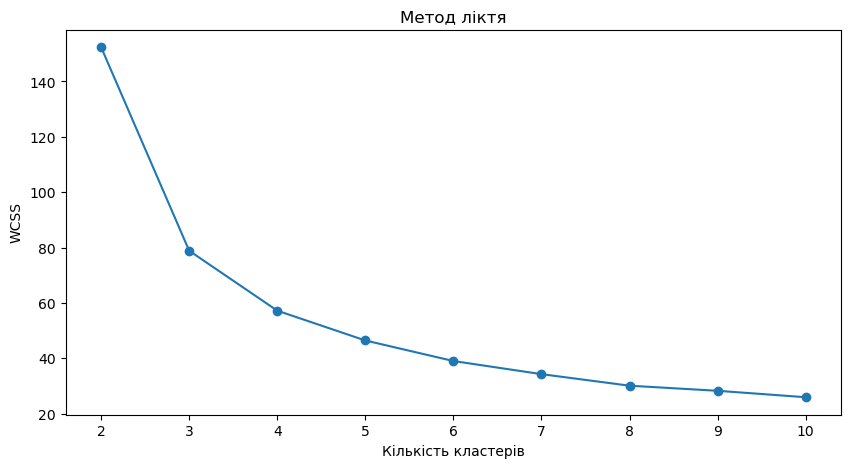

In [4]:
# Метод ліктя
wcss = []
range_n_clusters = list(range(2, 11))  # Від 2 до 10 кластерів
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

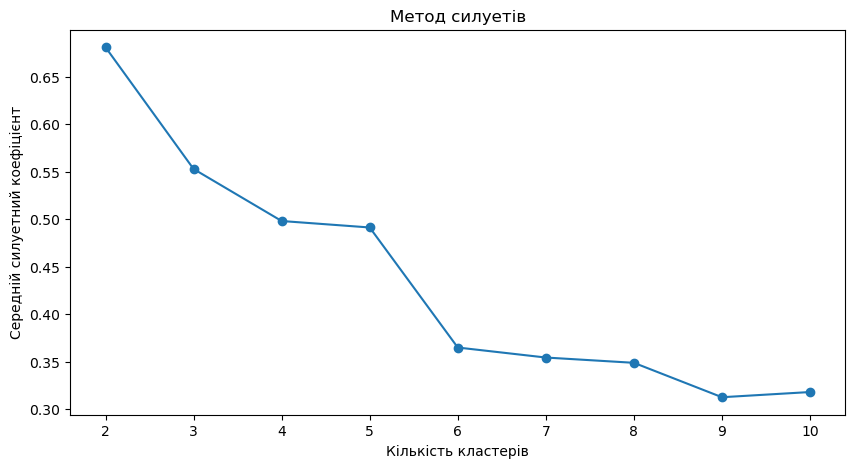

In [5]:
# Метод силуетів
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силуетний коефіцієнт')
plt.show()

In [6]:
# Оптимальна кількість кластерів (знайдена вручну або автоматично)
optimal_clusters = 3  # Наприклад, згідно з методом ліктя та силуетів


In [7]:
# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


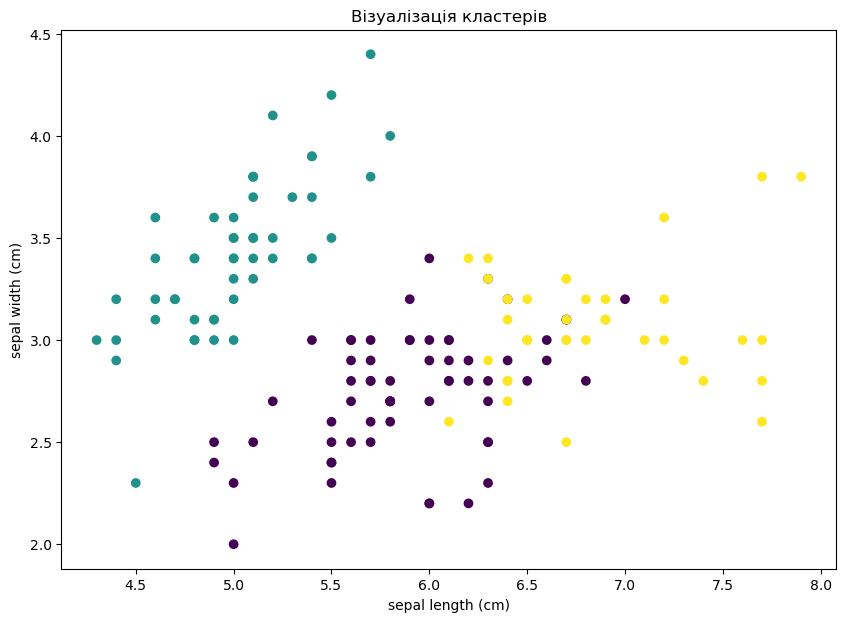

In [8]:
# Візуалізація кластерів
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['cluster'], cmap='viridis')
plt.title('Візуалізація кластерів')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()